# <font color='blue'>Producción de azúcar en Colombia para el año de 1995 a 2016</font> 


* Oscar Julian Layton Galindo

La información a la producción de algunos bienes del sector industrial en Colombia desde el año 1995 hasta la fecha es proporcionada por el Banco de la República a través de mediciones mensuales a nivel nacional. Dentro de esta información se incluyen bienes tales como: el cemento gris, lingotes de acero, carbón y azúcar. Para realizar el siguiente análisis de series de tiempo, se selecciona la variable $\textbf{Producción de Azúcar}$, mediada a través de toneladas por mes. Como se mencionó, la variable $\textbf{"Producción de azúcar}$" es medida con una periodicidad mensual, para lo cual se tomará el rango de tiempo desde Febrero de 1995 hasta Marzo de 2016, teniendo así un total de 254 observaciones.

En el presente documento se usará **Spyder** y **Jupyter** como herramienta computacional.

Para dar inicio al análisis de la serie, se presenta a continuación las primera 10 observaciones de la producción de azucar, para el año inicial de 1965.

In [6]:
import pandas           as pd
import matplotlib.pylab as plt
import scipy            as sp
import pmdarima         as pm
import numpy            as np
import math             as math

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools     import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools     import pacf

from statsmodels.tsa.arima_model   import ARIMA
from arch                          import arch_model
from matplotlib.pylab              import rcParams

In [7]:
produccion=pd.ExcelFile('C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\Proyecto\\prod_bienes_industria.xls')
produccion=produccion.parse('Datos')
ind = pd.date_range(start='2/1995', end='4/2016', freq='M')
produccion[['Periodo','Azucar']].head(10)

,Periodo,Azucar
0,Feb.,186151
1,Mar.,188408
2,Abr.,123473
3,May.,170266
4,Jun.,168927
5,Jul.,182420
6,Ago.,199119
7,Sep.,189389
8,Oct.,163727
9,Nov.,158211


## <font color='blue'>Gráfico de la serie</font> 

A continuación se presenta el gráfico de la serie de tiempo $\textbf{Producción de azúcar}$

C:\Users\YULY\anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


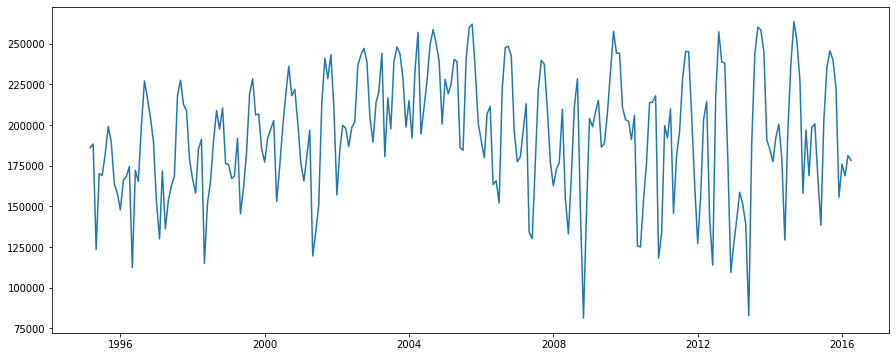

In [8]:
#### Serie Azucar ####
SerieAz = pd.Series(produccion['Azucar'].values, index=ind)
rcParams['figure.figsize'] = 15, 6
plt.plot(SerieAz)

De forma introductoria se analiza la serie de manera méramente descriptiva, para tener un conocimiento base sobre ésta y encaminar su análisis.

En el gráfico anterior se puede observar que los valores de la serie no oscilan alredor de un mismo valor, es decir la serie no es estacionaria. Por ejemplo para los datos observados hasta el año <font color='green'>2003</font> se observa una media más baja comparada con los datos del año <font color='green'>2003 - 2005</font> aproximadamente. Luego a partir del año <font color='green'>2005</font> se observan valores con un cambio mucho más grande de mes a mes. Cabe mencionar además que, la serie presenta una tendencia lineal creciente para el año de  <font color='green'>1996 - 2005</font>, la cual ya se no presenta a partir de éste último año.

Una observación final sobre la serie es la posible presencia de $\textbf{heterocedasticidad}$, es decir, varianza no constante a lo largo del tiempo. Esto se puede intuir ya que hasta el año <font color='green'>2005</font> los cambios en la producción de azúcar cambian mucho menos a comparación de la producción a partir del año <font color='green'>2005</font>. Para este caso se consideró analizar un modelo GARCH ante la existencia de heterocedasticidad, sin embargo al aplicar la prueba basada en los multiplicadores de lagrange, la cual juzga la hipótesis 

$$ H_{0}:\alpha_1=\alpha_2= ... = \alpha_p = 0$$ 

donde los $\alpha_i$ están presenten en la regresión $a_0 +\alpha_1 a_1^2 +\alpha_2 a_2^2 + ... + \alpha_p a_p^2$ (esto para probar si la varianza $\sigma^2$ cambia a través del tiempo) produjo resultados para diferentes rezagos, estos resultados no fueron significativos, por lo cual el modelo GARCH no es adecuado para esta serie y por lo tanto no se ajustará.

El análisis de éstas observaciones se hará consecuentemente en este documento bajo la teoría de series de tiempo, es decir, basados en los Modelos Estructurales y Modelos SARIMA.

## <font color='blue'>Transformación Box - Cox</font>

Una alternativa para estabilizar la varianza de la serie, es el uso de la transformación Box - Cox, la cual se define como:

$$
f_x(U_t)=\left\{\begin{matrix}
 \displaystyle\frac{U_t^\lambda - 1}{\lambda} & \lambda>0\\ 
Ln (U_t) & \lambda=0
\end{matrix}\right.
$$

donde el valor de $\lambda$ es el valor objetivo, el cual es el que mejor se ajusta a los datos para lograr una mejor estabilización de la serie. Haciendo uso de la función $boxcox$ en python se obtiene dicho valor.

In [9]:
sp.stats.boxcox(SerieAz,alpha=0.05)

(array([1.21889206e+08, 1.24219891e+08, 6.39370666e+07, 1.05945871e+08,
        1.04639367e+08, 1.18071739e+08, 1.35497550e+08, 1.25237916e+08,
        9.96217598e+07, 9.43979452e+07, 8.49099243e+07, 1.01969829e+08,
        1.04024756e+08, 1.10179238e+08, 5.52359561e+07, 1.07830526e+08,
        1.01258029e+08, 1.35920233e+08, 1.66675295e+08, 1.54822591e+08,
        1.41151198e+08, 1.25952643e+08, 8.88273779e+07, 6.93981681e+07,
        1.07493129e+08, 7.46454067e+07, 9.02402752e+07, 9.87033621e+07,
        1.04269665e+08, 1.56135826e+08, 1.67173724e+08, 1.50381420e+08,
        1.46079766e+08, 1.14606420e+08, 1.02577105e+08, 9.43773160e+07,
        1.20793995e+08, 1.27155498e+08, 5.70562461e+07, 8.85569500e+07,
        1.00785145e+08, 1.25971389e+08, 1.46147918e+08, 1.33895729e+08,
        1.47857679e+08, 1.12007953e+08, 1.11436673e+08, 1.02905909e+08,
        1.04534245e+08, 1.27887792e+08, 8.27053396e+07, 9.75108511e+07,
        1.18287467e+08, 1.57439536e+08, 1.68309898e+08, 1.432693

Luego se sugiere tomar $\lambda = 1.57$ para transformar la serie. A continuación se muestra el gráfico de la serie transformada

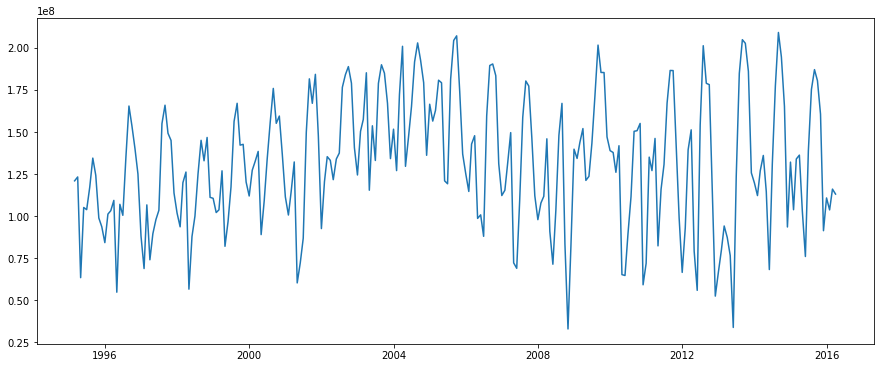

In [10]:
SerieT = sp.stats.boxcox(SerieAz,lmbda=1.571)
SerieT = pd.Series(SerieT,index=ind) 
plt.plot(SerieT)

Se observa que la serie sigue presentando las mismas característica mencionadas anteriormente, sin embargo los valores de estos cambios son más pequeños; por lo tanto se tomará la serie transformada para su análisis y posteriormente se retornará a los valores originales de la serie.

# <font color='blue'>Modelo ARIMA</font>

Se analizará la serie, de manera que se determine si presenta tanto raíz unitaria como raíz estacional y así ajustar un modelo Sarima, Arima o Arma.

Para empezar se hará uso de la prueba de Dickey Fuller la cual juzga la prueba para la tendencia dada por:

$\hspace{2cm}$ $ H_{0}:$ Hay presencia de raíz unitaria $\hspace{0.5cm}$ $\textbf{vs}$ $\hspace{0.5cm}$ $ H_{1}:$ No hay presencia de raíz unitaria

cabe mencionar que esta prueba es usada para determinar el número de diferenciaciones ordinarias usadas para la tendencia de la serie y así obtener una serie estacionaria. Si la serie presenta raíz unitaria para la tendencia se modelará de la siguiente manera:

* **Determinística** : Cuando la serie presenta una relación en función del tiempo $f(t)$, en este caso se ajustará un modelo $f(t)$ + ARMA(p,q).

* **Estocástica** : Cuando es necesario el uso de diferenciaciones ordinarias, en este caso se ajustará un modelo ARIMA.

A continuación se presenta la salida para la prueba de Dickey Fuller para la serie transformada, esto, para saber si existe **drift**(tendencia constante "c"), **lineal**(tendencia lineal "ct") y **No tendencia**(No tendencia determinística "nc").  


In [12]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(SerieT, regression='c')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -3.184762
p-value                          0.020884
#Lags Used                      14.000000
Number of Observations Used    239.000000
dtype: float64


In [13]:
adf = adfuller(SerieT, regression='ct')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -3.090695
p-value                          0.108461
#Lags Used                      14.000000
Number of Observations Used    239.000000
dtype: float64


In [14]:
adf = adfuller(SerieT, regression='nc')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -0.020276
p-value                          0.677494
#Lags Used                      16.000000
Number of Observations Used    237.000000
dtype: float64


Fijando $\alpha=0.05$ y observando los valores-p, según la prueba de Dickey Fuller, la serie no presenta una tendencia constante **(0.02)**, pero sí una tendencia lineal **(0.10)** y una tendencia estocástica **(0.67)**.

Para el caso de la tendencia lineal, la serie se diferencia ordinariamente una vez y luego se le ajusta el mejor modelo ARMA(p,q) a la serie diferenciada. Siguiendo esto, se procede a diferenciar la serie para luego obtener el gráfico de la función de autocorrelación simple y parcial.

Text(0.5, 1.0, 'Serie de producción de azucar diferenciada ordinariamente')

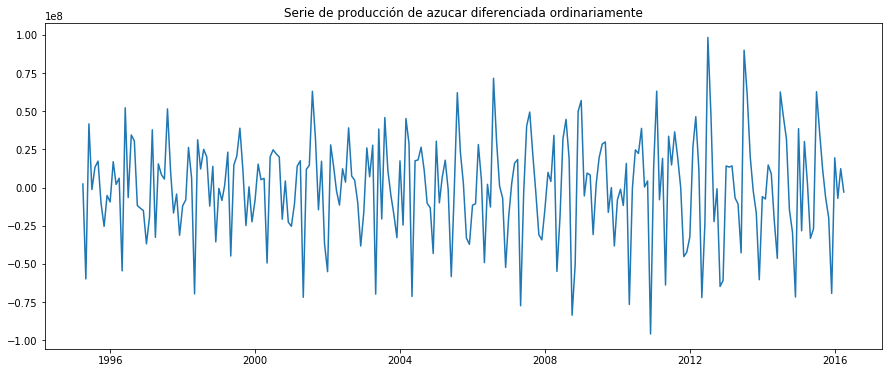

In [15]:
import statsmodels.api as smapi

SerieTd = SerieT.diff(periods=1)[1:]
plt.plot(SerieTd)
plt.title('Serie de producción de azucar diferenciada ordinariamente')

en el gráfico anterior se observa que la tendencia determinística ha sido eliminada. Ahora se ajustará un modelo ARMA a esta serie. A continuación se presenta el gráfico de la función de autocorrelación simple y parcial.

C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


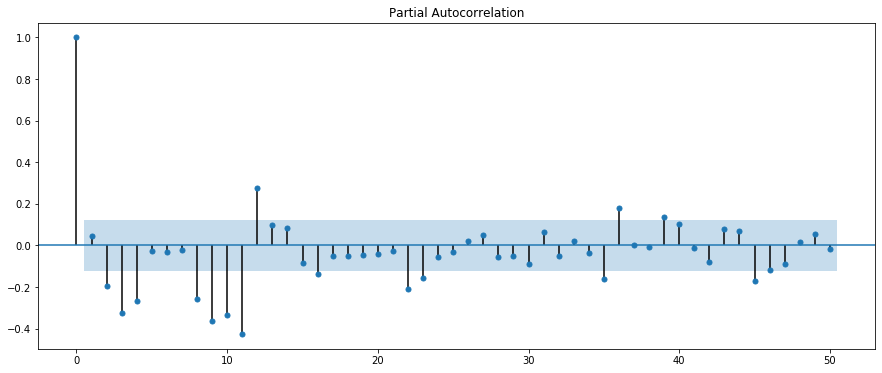

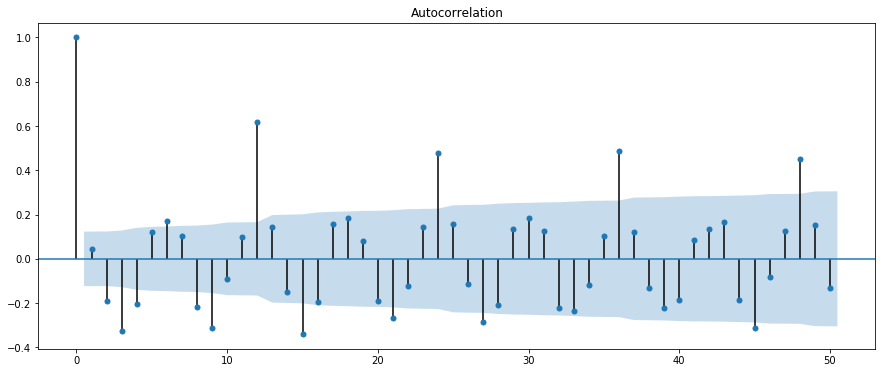

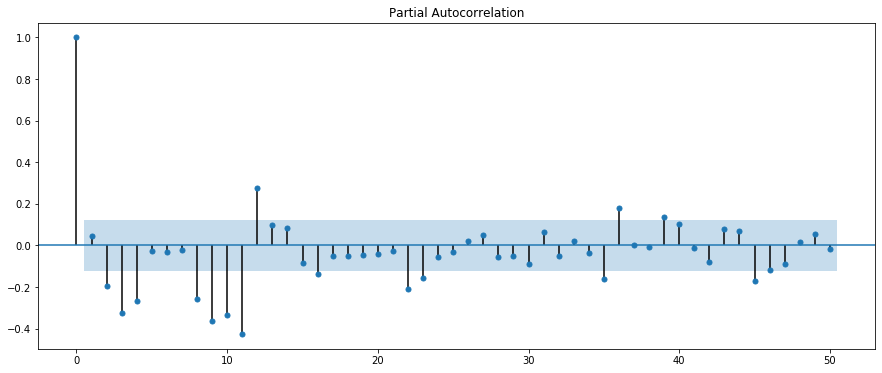

In [16]:
acf(SerieTd,nlags=50,unbiased=False)
plot_acf(SerieTd,lags=50,unbiased=False)
pacf(SerieTd,nlags=50)
plot_pacf(SerieTd,lags=50)

de los gráficos antes mostrados se puede observar que se sugiere ajustar un modelo <font color='green'>ARMA(12,15)</font>, teniendo en cuenta $\sqrt{254}=15$ rezagos; sin embargo los parámetros son significativos a partir del los órdenes $p=4$ y $q=4$, por lo tanto se procede buscar el mejor modelo ARMA usando todas las posibles combinaciones de modelos partiendo de un ARMA(4,4). El procedimiento se presenta a continuación:

In [17]:
arma=ARIMA(SerieTd,order=(3,0,3))
arma_fit=arma.fit()
print(arma_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  253
Model:                     ARMA(3, 3)   Log Likelihood               -4689.003
Method:                       css-mle   S.D. of innovations       26768633.684
Date:                Sun, 16 Feb 2020   AIC                           9394.007
Time:                        15:11:45   BIC                           9422.274
Sample:                    03-31-1995   HQIC                          9405.380
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04    1.6e+06     -0.019      0.984   -3.16e+06     3.1e+06
ar.L1.y        0.0163      0.033      0.488      0.626      -0.049       0.082
ar.L2.y       -0.0167      0.033     -0.501      0.6

In [18]:
arma=ARIMA(SerieTd,order=(3,0,2))
arma_fit=arma.fit()
print(arma_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  253
Model:                     ARMA(3, 2)   Log Likelihood               -4697.356
Method:                       css-mle   S.D. of innovations       27895342.153
Date:                Sun, 16 Feb 2020   AIC                           9408.713
Time:                        15:11:50   BIC                           9433.447
Sample:                    03-31-1995   HQIC                          9418.664
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04   2.04e+05     -0.153      0.879    -4.3e+05    3.68e+05
ar.L1.y        0.5616      0.254      2.212      0.027       0.064       1.059
ar.L2.y       -0.1051      0.199     -0.529      0.5

In [87]:
arma=ARIMA(SerieTd,order=(3,0,1))
arma_fit=arma.fit()
print(arma_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  253
Model:                     ARMA(3, 1)   Log Likelihood               -4697.499
Method:                       css-mle   S.D. of innovations       27911044.941
Date:                Tue, 09 Jul 2019   AIC                           9406.999
Time:                        23:35:53   BIC                           9428.199
Sample:                    03-31-1995   HQIC                          9415.529
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04   2.05e+05     -0.152      0.880   -4.33e+05    3.71e+05
ar.L1.y        0.7008      0.066     10.676      0.000       0.572       0.829
ar.L2.y       -0.2123      0.075     -2.831      0.0

In [88]:
arma=ARIMA(SerieTd,order=(3,0,0))
arma_fit=arma.fit()
print(arma_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  253
Model:                     ARMA(3, 0)   Log Likelihood               -4718.403
Method:                       css-mle   S.D. of innovations       30403579.786
Date:                Tue, 09 Jul 2019   AIC                           9446.805
Time:                        23:35:54   BIC                           9464.472
Sample:                    03-31-1995   HQIC                          9453.913
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04   1.27e+06     -0.024      0.981   -2.53e+06    2.46e+06
ar.L1.y       -0.0098      0.059     -0.165      0.869      -0.126       0.107
ar.L2.y       -0.1731      0.059     -2.954      0.0

In [89]:
arma=ARIMA(SerieTd,order=(0,0,3))
arma_fit=arma.fit()
print(arma_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  253
Model:                     ARMA(0, 3)   Log Likelihood               -4701.897
Method:                       css-mle   S.D. of innovations       28408658.037
Date:                Tue, 09 Jul 2019   AIC                           9413.795
Time:                        23:35:55   BIC                           9431.462
Sample:                    03-31-1995   HQIC                          9420.903
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04   1.86e+05     -0.167      0.868   -3.96e+05    3.34e+05
ma.L1.y       -0.2459      0.058     -4.274      0.000      -0.359      -0.133
ma.L2.y       -0.3348      0.065     -5.117      0.0

In [90]:
arma=ARIMA(SerieTd,order=(1,0,3))
arma_fit=arma.fit()
print(arma_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  253
Model:                     ARMA(1, 3)   Log Likelihood               -4701.386
Method:                       css-mle   S.D. of innovations       28350512.566
Date:                Tue, 09 Jul 2019   AIC                           9414.771
Time:                        23:35:56   BIC                           9435.971
Sample:                    03-31-1995   HQIC                          9423.301
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04   1.82e+05     -0.171      0.864   -3.87e+05    3.25e+05
ar.L1.y        0.1510      0.140      1.078      0.282      -0.123       0.425
ma.L1.y       -0.3721      0.131     -2.847      0.0

In [91]:
arma=ARIMA(SerieTd,order=(2,0,3))
arma_fit=arma.fit()
print(arma_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  253
Model:                     ARMA(2, 3)   Log Likelihood               -4695.604
Method:                       css-mle   S.D. of innovations       27699825.878
Date:                Tue, 09 Jul 2019   AIC                           9405.208
Time:                        23:35:57   BIC                           9429.942
Sample:                    03-31-1995   HQIC                          9415.159
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04   2.01e+05     -0.155      0.877   -4.25e+05    3.62e+05
ar.L1.y        0.8008      0.129      6.215      0.000       0.548       1.053
ar.L2.y       -0.5356      0.102     -5.241      0.0

In [92]:
arma=ARIMA(SerieTd,order=(4,0,4))
arma_fit=arma.fit()
print(arma_fit.summary())

C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  253
Model:                     ARMA(4, 4)   Log Likelihood               -4670.188
Method:                       css-mle   S.D. of innovations       24667024.238
Date:                Tue, 09 Jul 2019   AIC                           9360.377
Time:                        23:36:08   BIC                           9395.711
Sample:                    03-31-1995   HQIC                          9374.593
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.107e+04    1.8e+05     -0.173      0.863   -3.84e+05    3.22e+05
ar.L1.y        0.6758      0.063     10.754      0.000       0.553       0.799
ar.L2.y       -0.0228      0.044     -0.519      0.6

luego observando todos estos posibles modelos, y teniendo en cuenta el criterio de información BIC concluimos que el mejor modelo para este caso es el modelo ARMA(4,4) ya que presenta un menor valor BIC. Todos los parámetros del modelo son significativos excepto $\phi_2$ y $\theta_2$. Así se obtiene el modelo **ARIMA(4,1,4)** dado por $y_t = (1-B)^1X_t$, donde $X_t$

$$  X_t = \phi_1X_{t-1} + \phi_3X_{t-3} + \phi_4X_{t-4} + Z_t + \theta_1Z_{t-1} + \theta_3Z_{t-3} + \theta_4Z_{t-4} $$

$$  X_t = 0.6758X_{t-1} - 0.9759X_{t-3} + 0.6519X_{t-4} + Z_t - 1.0236Z_{t-1} + 0.9712Z_{t-3} - 0.9433Z_{t-4} $$

finalmente este modelo **ARIMA(4,1,4)** será comparado con los modelos SARIMA, ARCH y Modelos Estructurales que se ajustarán a lo largo del documento.

In [93]:
Arima=ARIMA(SerieT,order=(4,1,4))
Arima_fit=Arima.fit()

C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## Supuestos modelo ARIMA(4,1,4)

A continuación se presentan los gráficos de diagnóstico para el modelo **ARIMA(4,1,4)**. Estos gráficos para tener una idea visual del comportamiento de los residuales del modelo.

C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


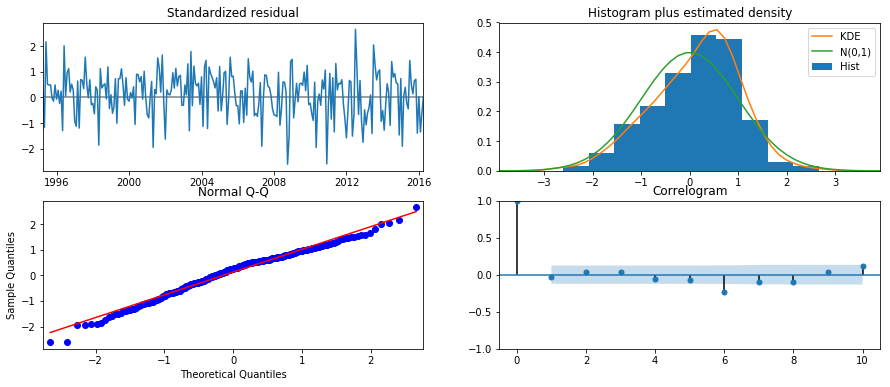

array([[1.40258529, 0.12304798]])

In [94]:
Arimares = smapi.tsa.statespace.SARIMAX(SerieT, order=(4,1,4))
Arima_fitres = Arimares.fit()
Arima_fitres.plot_diagnostics()
plt.show()
## Heterocedasticiddad 
Arima_fitres.test_heteroskedasticity(method='breakvar')

el valor p anterior(0.12), se usa para juzgar la hipótesis $H_{0}:$ Homocedasticidad, con un nivel de significancia $\alpha=0.05$ se acepta la hipótesis de Homocedasticidad.

In [95]:
## Normalidad
Arima_fitres.test_normality(method='jarquebera')

array([[ 6.96104056,  0.03079139, -0.40174522,  3.12140422]])

según la prueba de Jarquebera, se rechaza la hipótesis $H_{0}:$ Normalidad.

In [96]:
## Correlacion con Ljung - Box
Arima_fitres.test_serial_correlation(method='ljungbox',lags=1)

array([[[0.16389628],
        [0.68559434]]])

para observar si lo residuales heredan la NO correlación del ruido, lo cual es lo ideal, se usa la prueba de Ljung-Box. Para el primer rezago, la hipótesis $H_0:$ No correlación, es aceptada ya que se obtiene un valorp = $0.68$

Para observar si los residuales del modelo son NO correlacionados para rezagos más grandes, se pressenta el gráfico de la autocorrelación simple y parcial para estos a continuación

C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


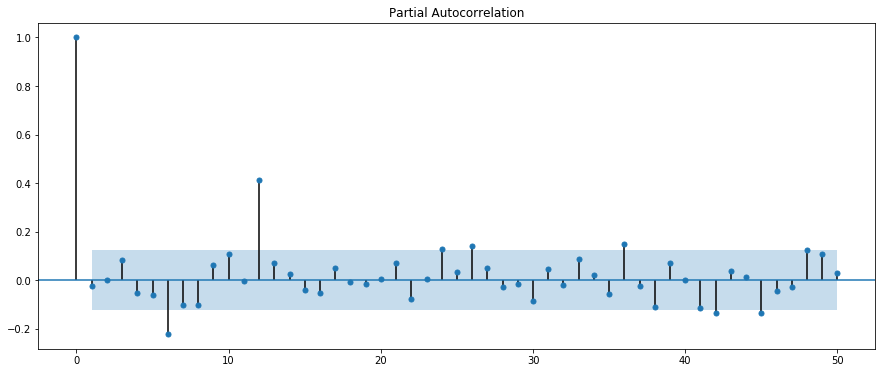

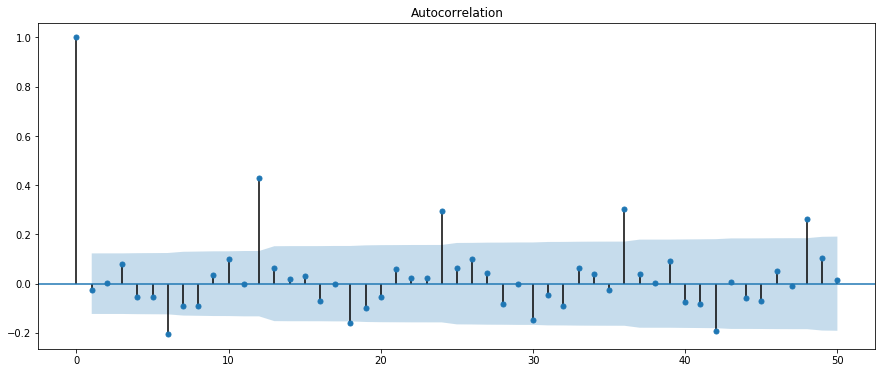

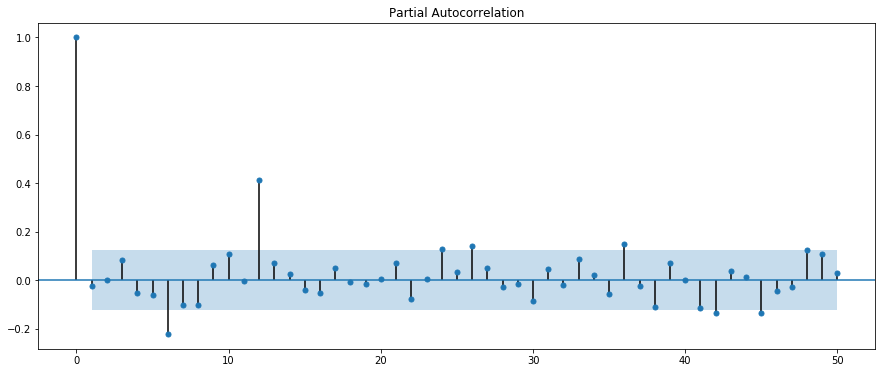

In [97]:
Arimares = smapi.tsa.statespace.SARIMAX(SerieT, order=(4,1,4))
Arima_fitres = Arimares.fit()

res_Arima = Arima_fitres.resid

plot_acf(res_Arima,lags=50,unbiased=False)
plot_pacf(res_Arima,lags=50)


se los gráficos anteriores se puede observar que aún existe correlación para diferentes rezados de este modeo. En este caso se presenta una correlación significativa para el rezago 6 y el rezago 12. La correlación del rezago 12 puede ser debida a la existencia de estacionalidad en los datos, ésta puede ser corregida más adelante mediante un modelo **Sarima**. Ahora se ajusta un modelo Arima(6,1,6) para ver si la correlación significativa que se expresa en el rezago 6 es debida a la no explicación de este orden.

C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


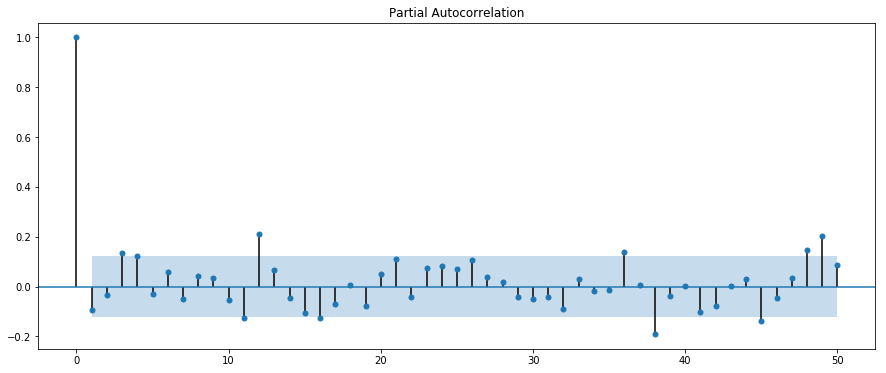

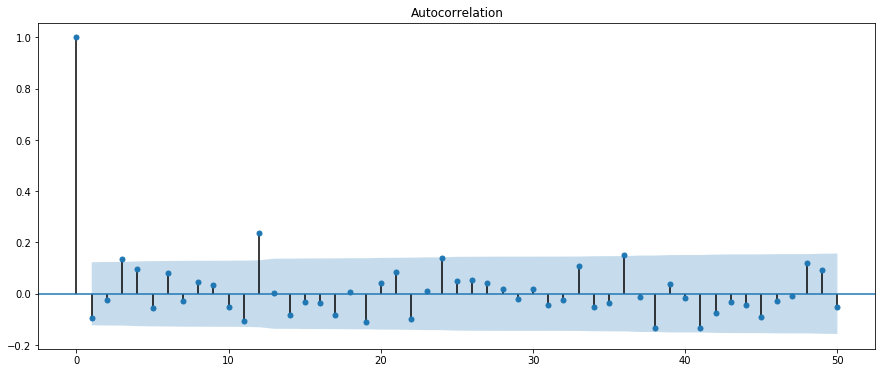

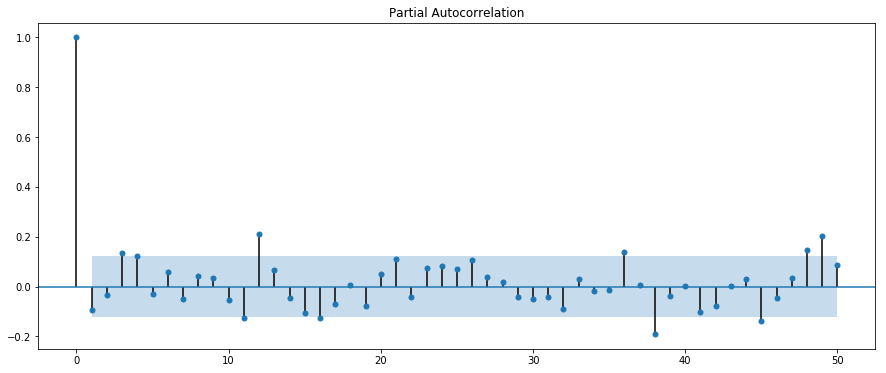

In [98]:
Arimares = smapi.tsa.statespace.SARIMAX(SerieT, order=(6,1,6))
Arima_fitres = Arimares.fit()

res_Arima = Arima_fitres.resid

plot_acf(res_Arima,lags=50,unbiased=False)
plot_pacf(res_Arima,lags=50)


añadiendo el orden 6 para p y q, se observa que ya no se presenta una correlación significativa en los rezagos, sin embargo sigue existiendo para el rezago $h=12$. Se ajustaron nuevos modelos con órdenes cercanos a 6 para saber si presentaban un mejor criterio de información al $ARIMA(4,1,4)$, de esta manera se presenta la tabla con los respectivos valores BIC tanto de los modelos ajustados debido a la presencia de correlación en los residuales como los modelos ajustados anteriormente.

Modelo | Criterio BIC
-- | --
ARIMA(6,1,5)| 9585,719 
ARIMA(5,1,6)| 9410,145
$\textbf{ARIMA(4,1,4)}$| $\textbf{9395,711}$
ARIMA(3,1,3)| 9422,274 
ARIMA(3,1,2)| 9433,447 
ARIMA(3,1,1)| 9428,199 
ARIMA(3,1,0)| 9464,472 
ARIMA(0,1,3)| 9431,462 
ARIMA(1,1,3)| 9435,971
ARIMA(2,1,3)| 9429,942

por esto finalmente se decide seleccionar el modelo $ARIMA(4,1,4)$ para ser comparado con modelos estimados posteriormente.
 

## Pronósticos modelo ARIMA(4,1,4)

Ahora tomamos el modelo ARIMA(4,1,4) para obtener los pronósticos 12 pasos adelante. Se debe resaltar que la serie original **"Producción de azúcar"** fue transformada usando Box - Cox con $\lambda=1.57$, luego el modeo ARIMA generará las predicciones en escala diferente. Para obtener las predicciones en la escala original de la serie, es decir, la producción en toneladas, es necesario aplicar la transformación inversa de Box - Cox, esto se realiza en las siguientes líneas, donde adicionalmente se presenta el gráfico de la serie original (resaltada en color verde) junto con las predicciones hechas por este modelo (resaltadas en color rojo).

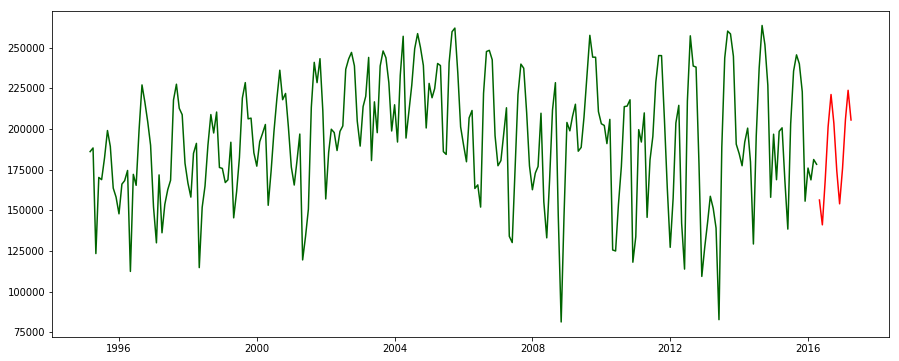

In [99]:
pronosticosArima=Arima_fit.forecast(steps=12)
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)
Pronosticos_Arima = inverse_boxcox(pronosticosArima[0],1.571)
ind_p=pd.date_range(start='4/2016', end='4/2017', freq='M')
Serie_pronosticos_arima=pd.Series(Pronosticos_Arima,index=ind_p)
plt.plot(Serie_pronosticos_arima,color='red')
plt.plot(SerieAz,color='darkgreen')

# <font color='blue'>Modelo SARIMA</font>

Existen casos en los cuales la no estacionariedad de la serie es debida a comportamientos cíclicos o estacionales, es aquí cuando los modelos SARIMA son necesarios, cuando existe la presencia de una raíz unitaria estacional. Como se mencionó anteriormente la prueba de Dickey Fuller arrojó que existe raíz unitaria estacional. La prueba se muestra de nuevo, donde el $ pvalor = 0.67 $, es decir, no se rechaza la hipótesis nula $H_{0}:$ Existe raíz unitaria.

In [100]:
adf = adfuller(SerieT, regression='nc')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -0.020276
p-value                          0.677494
#Lags Used                      16.000000
Number of Observations Used    237.000000
dtype: float64


Otra herramienta bastante útil que ayuda a determinar la presencia y el periodo de la estacionalidad en la serie, es el gráfico $"month plot"$, ya que este gráfico muestra las subseries para cada periodo de tiempo, en este caso, periodos mensuales. A continuación se presenta el gráfico month plot para la serie transformada.

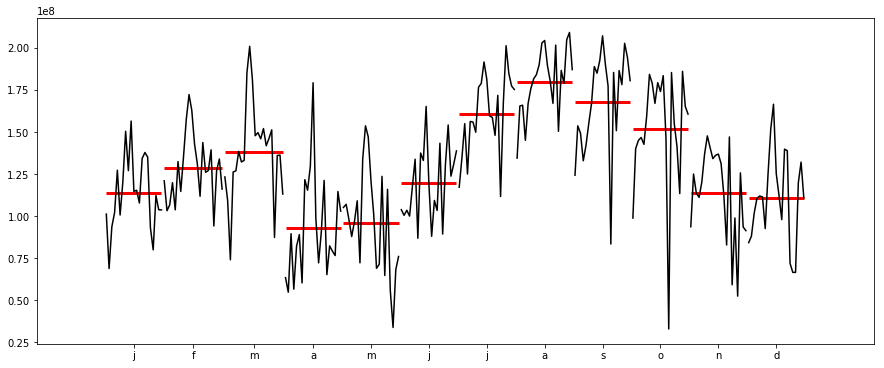

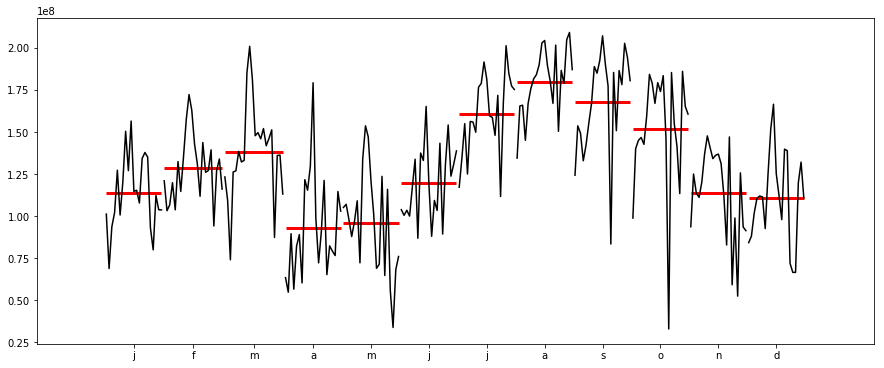

In [101]:
smapi.graphics.tsa.month_plot(SerieT)

el gráfico month plot muestra que la serie no es estacionaria, debido a que mensualmente la serie presenta diferentes medias a lo largo de los años. Esto puede intuir que la serie tiene un comportamiento diferente en cada mes de los diferentes años, es decir, el periodo estacional puede ser igual a 12. Para corroborar lo anterior, en la siguiente línea se diferencia la serie ordinariamente 12 veces para luego observar su comportamiento.

Text(0.5, 1.0, 'Serie de producción de azucar diferenciada estacionalmente')

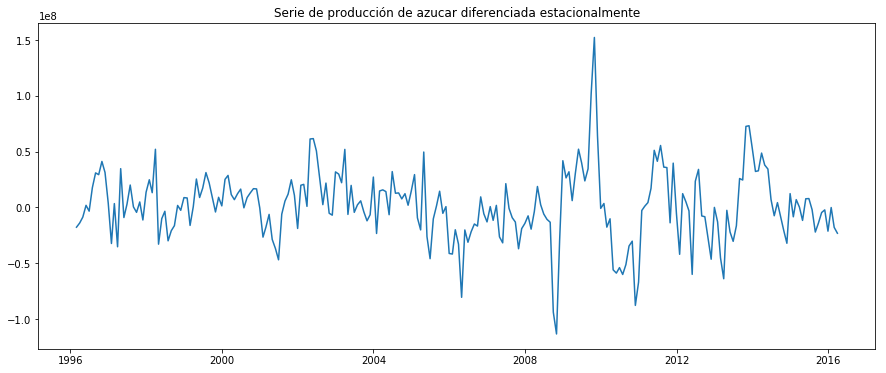

In [102]:
SerieTD = SerieT.diff(periods=12)[12:]
plt.plot(SerieTD)
plt.title('Serie de producción de azucar diferenciada estacionalmente')

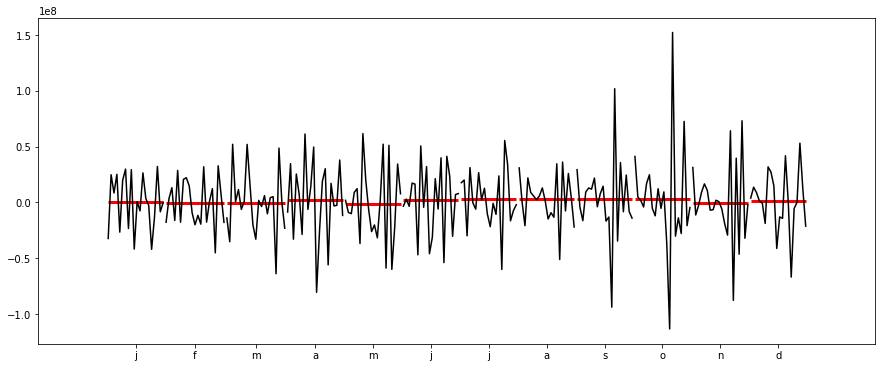

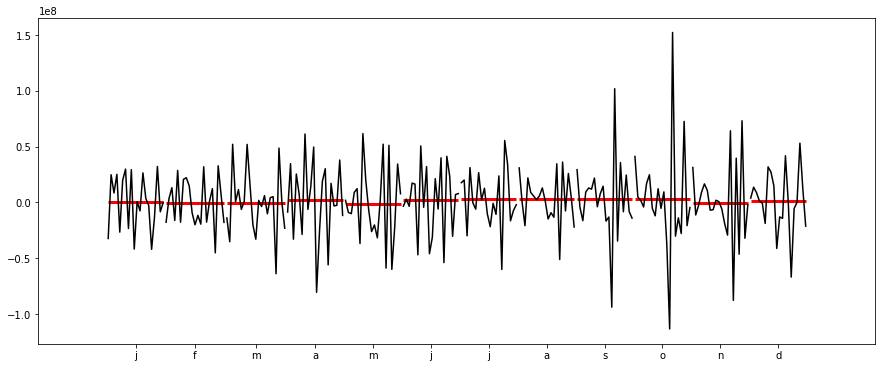

In [103]:
smapi.graphics.tsa.month_plot(SerieTD)

el gráfico anterior muestra que la media mensual ya parece haberse estabilizado y ahora se muestra oscilando alrededor de un mismo valor en cada mes aproximadamente. Para ver si aún se presenta raíz unitaria estacional se realiza nuevamente en la siguiente línea la prueba de Dickey Fuller pero ahora sobre la serie diferenciada estacionalmente.

In [104]:
adf = adfuller(SerieTD, regression='nc')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -3.844551
p-value                          0.000134
#Lags Used                      15.000000
Number of Observations Used    226.000000
dtype: float64


la anterior prueba arroja un $valorp=0.0001$, es decir, se rechaza la hipótesis $H_{0}:$ Existe raíz unitaria, concluyendo que ya no existe  presencia de raíz unitaria estacional en la serie y por lo tanto el periodo estacional es igual a $12$.

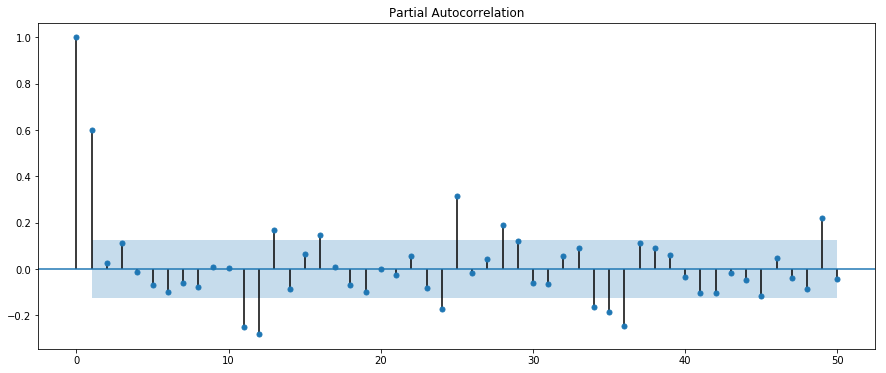

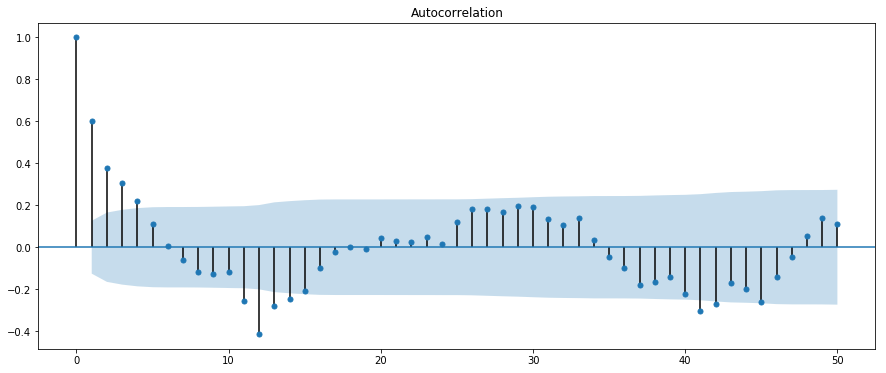

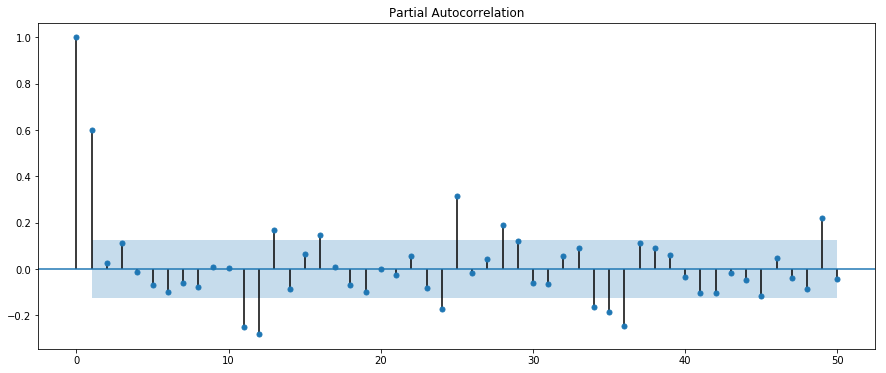

In [105]:
acf(SerieTD,nlags=50,unbiased=False)
plot_acf(SerieTD,lags=50,unbiased=False)
pacf(SerieTD,nlags=50)
plot_pacf(SerieTD,lags=50)

ayudados de los gráficos de autocorrelación parcial y simple para la serie diferenciada estacionalmente, se observa que se puede ajustar un modelo $SARIMA(p,d,q) x (P,D,Q) = SARIMA(1,1,4) x (3,1,1)$, ahora la idea será ver qué modelo se ajusta mejor variando los órdenes de $p,q,P$ y $Q$. Se ajustaron $8$ modelos SARIMA, sin embargo para una mejor visualización se presenta la tabla de dichos modelos junto con su respectivo criterio de información BIC y únicamente se mostrará la salida de los dos mejores modelos según este criterio.

Modelo | Criterio BIC
-- | --
SARIMA(1,1,3)X(3,1,1)| 8888.308
SARIMA(1,1,2)X(3,1,1)| 8883.866 
SARIMA(1,1,1)X(3,1,1)| 8879.696
SARIMA(1,1,0)X(3,1,1)| 8890.746 
SARIMA(0,1,1)X(3,1,1)| 8884.374 
SARIMA(1,1,1)X(2,1,1)| 8874.430 
SARIMA(1,1,1)X(1,1,1)| 8871.259 
SARIMA(1,1,1)X(0,1,1)| 8867.044 

In [106]:
Sarima1 = smapi.tsa.statespace.SARIMAX(SerieT, order=(1,1,1),seasonal_order=(1,1,1,12))
Sarima_fit1=Sarima1.fit(trend='t')
print(Sarima_fit1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  254
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4421.917
Date:                            Tue, 09 Jul 2019   AIC                           8853.835
Time:                                    23:37:48   BIC                           8871.259
Sample:                                02-28-1995   HQIC                          8860.855
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5922      0.121      4.911      0.000       0.356       0.829
ma.L1         -0.8911      0.081   

In [107]:
Sarima2 = smapi.tsa.statespace.SARIMAX(SerieT, order=(1,1,1),seasonal_order=(0,1,1,12))
Sarima_fit2=Sarima2.fit(trend='t')
print(Sarima_fit2.summary())


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  254
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -4422.552
Date:                            Tue, 09 Jul 2019   AIC                           8853.104
Time:                                    23:37:51   BIC                           8867.044
Sample:                                02-28-1995   HQIC                          8858.720
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5831      0.119      4.881      0.000       0.349       0.817
ma.L1         -0.8867      0.083   

Así los dos modelos **SARIMA(1,1,1)X(1,1,1)** y **SARIMA(1,1,1)X(0,1,1)** resultaron ser los que mejor se ajustaron, se harán pronósticos con ellos y se compararán más adelante con lo demás modelos resultantes de ARIMA, ARCH y Modelos Estructurales.

## Supuestos modelo Sarima(1,1,1)X(1,1,1)

A continuación se presenta los gráficos de diagnóstico para el modelo SARIMA(1,1,1)x(1,1,1). Estos gráficos para tener una idea visual del comportamiento de los residuales del modelo.

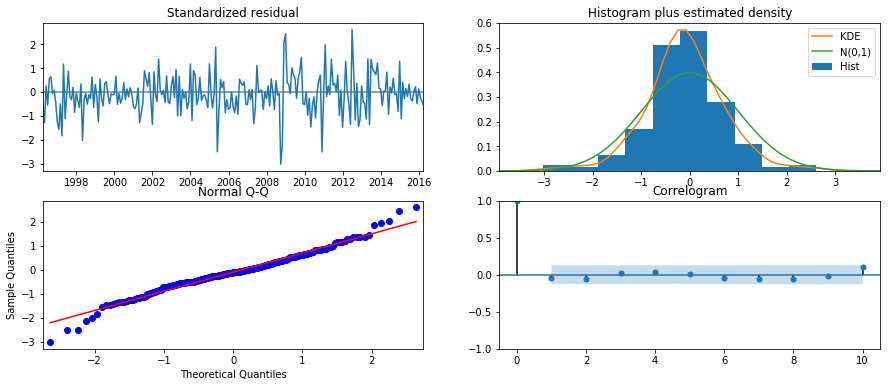

In [108]:
modelo_Sarima1 = smapi.tsa.statespace.SARIMAX(SerieT, order=(1,1,1),seasonal_order=(1,1,1,12))
Sarima_fit1=modelo_Sarima1.fit(trend='t')

## Diagnostico conjunto
Sarima_fit1.plot_diagnostics()
plt.show()

In [109]:
Sarima_fit1.test_heteroskedasticity(method='breakvar')

array([[1.6260073 , 0.03102532]])

según la prueba de **Breakvar** juzga la hipótesis $H_{0}:$ Homocedasticidad , observando el valor=$0.03$ se rechaza ésta hipótesis, concluyendo que existe heterocedasticidad.

In [110]:
Sarima_fit1.test_normality(method='jarquebera')

array([[ 2.18699881e+01,  1.78234770e-05, -2.70945670e-02,
         4.47478394e+00]])

según la prueba de **Jarquebera** la hipótesis $H_{0}$: Normalidad, es rechazada con valorp=$1.7x10^{-5}$, concluyendo así que los residuales no siguen una distribución normal, aunque observando la gráfico de diagnóstico, parece ser que siguieran una distribución más apuntada a la normal.

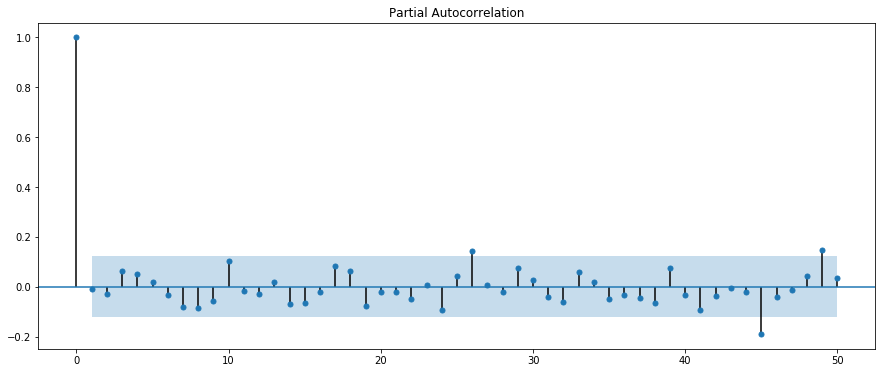

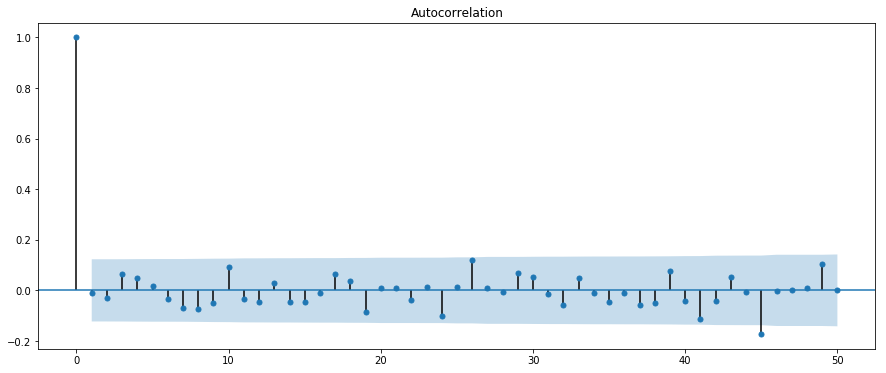

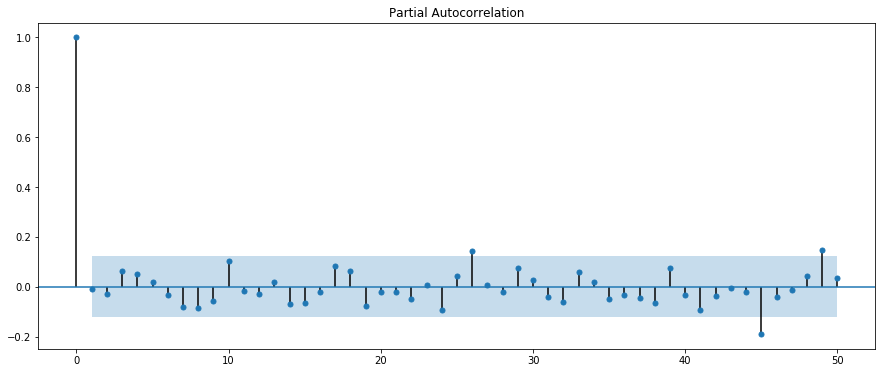

In [111]:
res_Sarima1 = Sarima_fit1.resid

plot_acf(res_Sarima1,lags=50,unbiased=False)
plot_pacf(res_Sarima1,lags=50)

observando los anteriores gráficos de correlación, se observa que no existe presencia de correlación para los residuos, tanto para la autocorrelación parcial como para la autocorrelación simple, es decir, la NO correlación de los residuos se cumple.

## Pronósticos modelo Sarima(1,1,1)X(1,1,1)

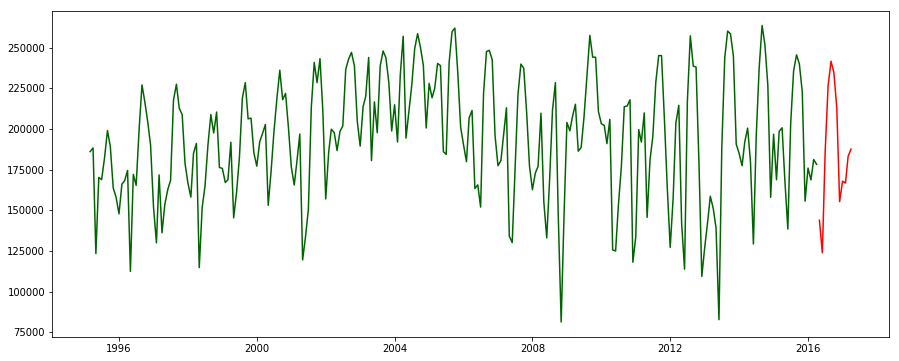

In [113]:
pronosticosSarima1=Sarima_fit1.forecast(steps=12)
Pronosticos_Sarima1 = inverse_boxcox(pronosticosSarima1,1.571)
Serie_pronosticos_sarima1=pd.Series(Pronosticos_Sarima1,index=ind_p)
plt.plot(Serie_pronosticos_sarima1,color='red')
plt.plot(SerieAz,color='darkgreen')

## Supuestos modelo Sarima(1,1,1)X(0,1,1)

A continuación se presenta los gráficos de diagnóstico para el modelo SARIMA(1,1,1)x(0,1,1). Estos gráficos se presentan para tener una idea visual del comportamiento de los residuales del modelo.

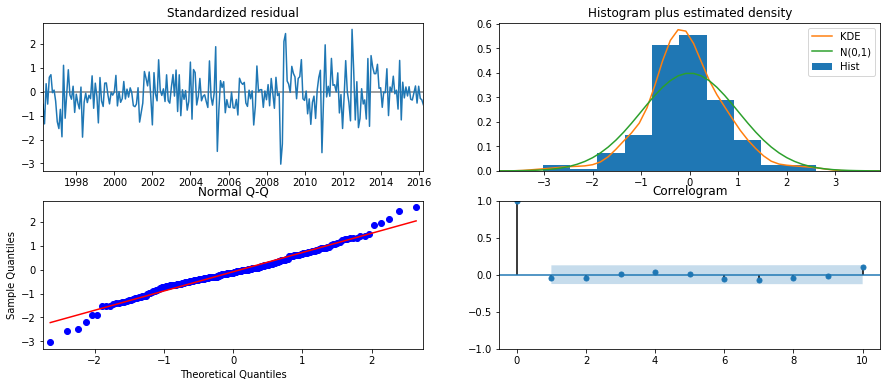

In [114]:
modelo_Sarima2 = smapi.tsa.statespace.SARIMAX(SerieT, order=(1,1,1),seasonal_order=(0,1,1,12))
Sarima_fit2=modelo_Sarima2.fit(trend='t')

## Diagnostico conjunto
Sarima_fit2.plot_diagnostics()
plt.show()

In [115]:
## Heterocedasticiddad 
Sarima_fit2.test_heteroskedasticity(method='breakvar')

array([[1.61557633, 0.03329863]])

según la prueba de **Breakvar** juzga la hipótesis $H_{0}:$ Homocedasticidad , observando el valor=$0.03$ se rechaza ésta hipótesis, concluyendo que existe heterocedasticidad.

In [116]:
## Normalidad
Sarima_fit2.test_normality(method='jarquebera')

array([[ 2.10240127e+01,  2.72078136e-05, -2.29633091e-02,
         4.44622556e+00]])

según la prueba de **Jarquebera** la hipótesis $H_{0}$: Normalidad, es rechazada con valorp=$2.7x10^{-5}$, concluyendo así que los residuales no siguen una distribución normal, aunque observando la gráfico de diagnóstico, parece ser que siguieran una distribución más apuntada a la normal.

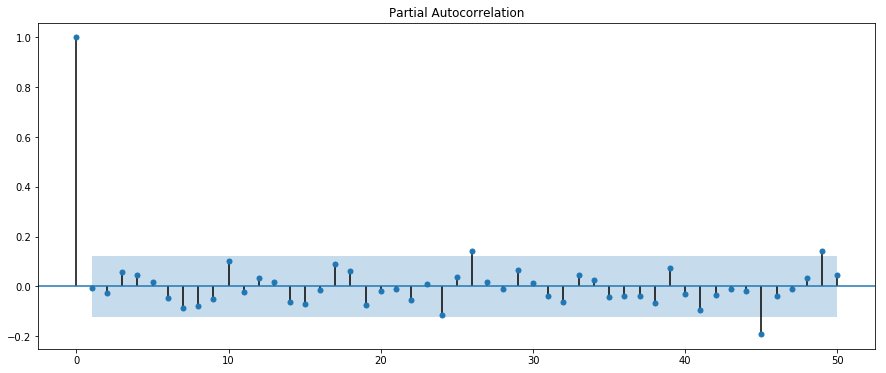

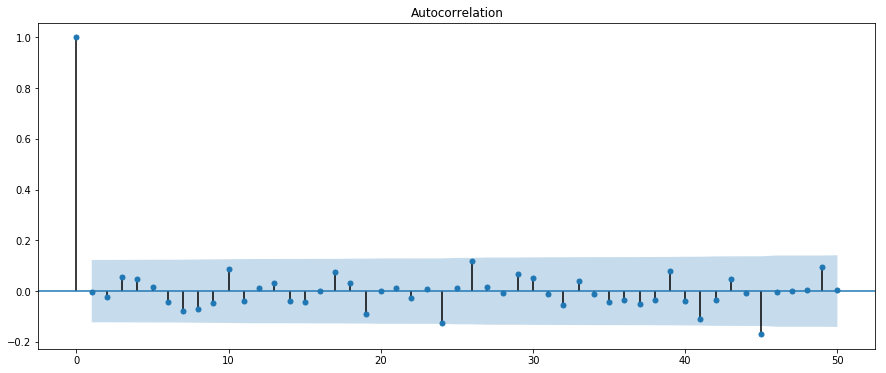

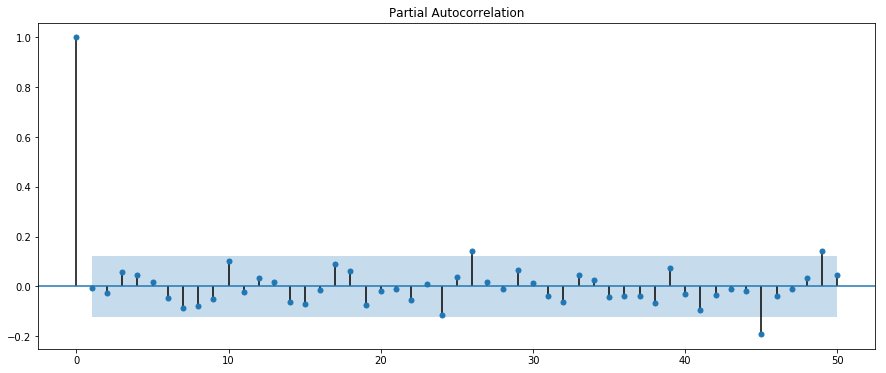

In [117]:
res_Sarima2 = Sarima_fit2.resid

plot_acf(res_Sarima2,lags=50,unbiased=False)
plot_pacf(res_Sarima2,lags=50)

observando los anteriores gráficos de correlación, se observa que no existe presencia de correlación para los residuos, tanto para la autocorrelación parcial como para la autocorrelación simple, es decir, la NO correlación de los residuos se cumple.

## Pronósticos modelo Sarima(1,1,1)X(0,1,1)

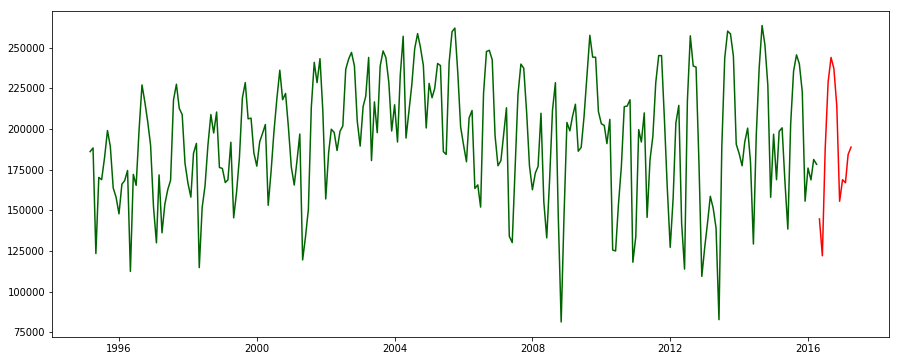

In [119]:
pronosticosSarima2=Sarima_fit2.forecast(steps=12)
Pronosticos_Sarima2 = inverse_boxcox(pronosticosSarima2,1.571)
Serie_pronosticos_sarima2=pd.Series(Pronosticos_Sarima2,index=ind_p)
plt.plot(Serie_pronosticos_sarima2,color='red')
plt.plot(SerieAz,color='darkgreen')

# <font color='blue'>Modelo Estructural</font>

Se procede a estimar cada una de las componentes del modelo estructural en las siguientes líneas, no obstante ha de considerarse que la estadística z y el pvalor no tienen algún significado dentro del proceso.

                            Unobserved Components Results                            
Dep. Variable:                             y   No. Observations:                  254
Model:                    local linear trend   Log Likelihood               -4654.822
                   + damped stochastic cycle   AIC                           9321.645
Date:                       Tue, 09 Jul 2019   BIC                           9342.773
Time:                               23:39:34   HQIC                          9330.148
Sample:                           02-28-1995                                         
                                - 03-31-2016                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   1.86e-07    7.8e+05   2.38e-13      1

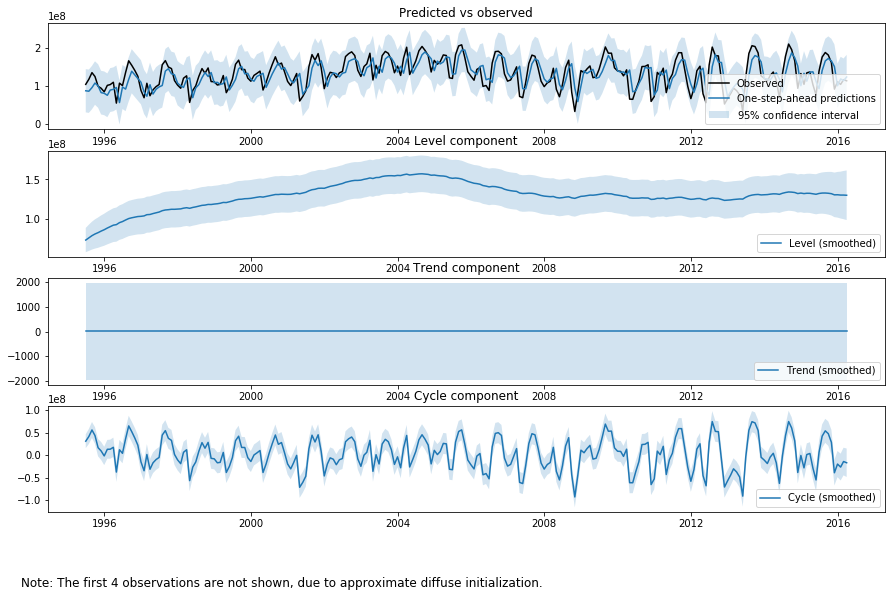

In [121]:
import statsmodels.api as sm

unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

output_mod = sm.tsa.UnobservedComponents(SerieT, **unrestricted_model)  
output_res = output_mod.fit(method='powell', disp=False) 
print(output_res.summary()) 

##Gráfico
fig = output_res.plot_components(legend_loc='lower right', figsize=(15, 9));  
output_res.forecast(12) 
serie_estruc_forecast=output_res.get_prediction(start='2016-03-31', end='2017-03-31') 


## Pronósticos modelo estructural

In [134]:
serie_estruc_forecast=output_res.get_prediction(start='2016-03-31', end='2017-03-31') 
forecast = serie_estruc_forecast.predicted_mean
ci = serie_estruc_forecast.conf_int(alpha=0.5)

In [135]:
arraypronosticosSTIC={'pronostico':forecast.values,'li':ci['lower y'].values,'ls':ci['upper y'].values}
indice=pd.date_range(start='2016-03-31',end='2017-03-31',freq='M')
pronosticosSTIC=pd.DataFrame(data=arraypronosticosSTIC,index=indice)

para volver los datos a la escala original nuevamente usamos la función inverse_boxcox

In [136]:
for column in ['pronostico', 'li', 'ls']:
    pronosticosSTIC[column] = inverse_boxcox(pronosticosSTIC[column],1.57)

Ahora, se presenta el gráfico de los pronósticos usando este modelo, representados por la línea de color rojo.

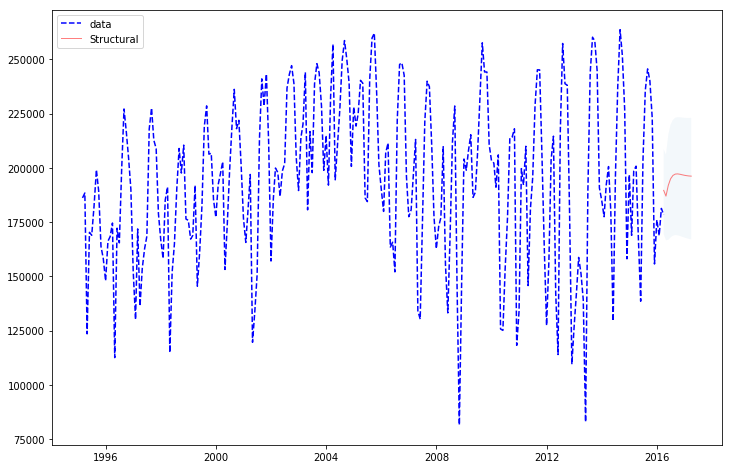

In [137]:
#######Gráfica de los pronósticos#####
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Actual data
ax.plot(SerieAz.astype('float64'), '--', color="blue", label='data')
# Means
ax.plot(pronosticosSTIC['pronostico'], lw=1, color="red", alpha=0.5, label='Structural')
ax.fill_between(pronosticosSTIC['pronostico'].index, pronosticosSTIC.iloc[:, 1], pronosticosSTIC.iloc[:, 2], alpha=0.05)
ax.legend(loc='upper left')
plt.draw()

# <font color='blue'>Comparación de modelos usando pronósticos (Rolling)</font>

Ahora compararemos los modelos obtenidos previamente usando el método **"Rolling"**, el cuál usa una muestra de entrenamiento, que generalmente es el $80\%$ de los datos de la serie, en este caso la muestra de entrenamiento estará conformada por las primeras $0.8 * 254 = 203$ y el $20\%$ restante $(51)$ de las observaciones conformarán el periodo de prueba. La idea general del método es la estimación de las observaciones presenten en el periodo de prueba, para ser comparadas con el valor real y ver cuánto es su error de estimación dado por

$$ x_t  - \hat{x_t}$$

posteriormente se toma la primera observación presente en el periodo de prueba y ahora hará parte del periodo de entrenamiento para así calcular ahora la estimación de la siguiente observación. Este ejercicio se repite de manera iterativa hasta estimar el $20\%$ de los datos presentes en la muestra de prueba. Finalmente se calcula el error cuadrático medio (ECM) de estas observaciones como sigue

$$ \displaystyle\sum_{t=T_{0+1}}^{T} \displaystyle\frac{(x_t-\hat{x_t})^2}{n-1} $$

donde $T_{0+1}$ es igual a la observación $204$ y $T=254$ el tamaño total de la serie. Para concluir, el modelo que tenga menor ECM será el mejor modelo. Cabe mencionar que los modelos fueron ajustados sobre la serie transformada según Box-Cox, por lo tanto es necesario pasar los datos a la base original, es se realiza mediante la funcion **"inverse_boxcox"** la cual está presente en las líneas siguientes y en los gráficos de los pronósticos anteriormente obtenidos.

## Modelo ARIMA(4,1,4)

En la siguiente línea se calculará ECM para el modelo ARIMA(4,1,4) 12 pasos adelante.

In [55]:
X = SerieT.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = smapi.tsa.statespace.SARIMAX(history, order=(4,1,4))
	modelo_fit = output_mod.fit()
	output = modelo_fit.forecast(12)  
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))

C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=151388.249944, Esperado=158636.732370


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=181156.104085, Esperado=205229.166895


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=228779.825398, Esperado=216198.947172


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=194688.601291, Esperado=143213.569610


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=154845.400555, Esperado=114734.543888


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=133811.343825, Esperado=218813.924809


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=236964.169416, Esperado=259300.093878


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=247328.099867, Esperado=240588.346537


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=192585.924532, Esperado=239913.893646


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=230218.634203, Esperado=179947.306885


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=153884.130202, Esperado=110206.102694


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=136725.486280, Esperado=128241.928967


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=173420.065902, Esperado=144093.397199


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=171272.043917, Esperado=159861.315021


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=193865.150705, Esperado=152394.982964


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=155183.781958, Esperado=140194.164683


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=169262.295698, Esperado=83401.835306


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=113566.014841, Esperado=190252.929027


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=210867.860914, Esperado=245563.607746


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=237790.581887, Esperado=262227.916508


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=220989.426305, Esperado=260476.664713


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=226716.606037, Esperado=246634.280295


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=208860.135155, Esperado=192152.009087


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=204071.766743, Esperado=186289.495217


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=217268.316599, Esperado=178767.989885


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=202717.721655, Esperado=193390.852792


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=183294.969059, Esperado=202082.051152


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=171191.295010, Esperado=181201.218561
Predicción=163815.174980, Esperado=130272.551441


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=158230.677827, Esperado=197099.349896


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=222097.424593, Esperado=239197.099743


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=243179.588217, Esperado=265711.286290


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=234670.728815, Esperado=253773.180473


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=211628.649645, Esperado=228670.168114


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=201913.324349, Esperado=159214.250849


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=183506.947440, Esperado=198323.093167


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=227155.831486, Esperado=170116.794906


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=201002.626078, Esperado=200089.162762


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=189610.086449, Esperado=202272.570729


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=176783.012678, Esperado=169259.048441


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=154803.497669, Esperado=139512.889423


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=166412.534947, Esperado=204624.337639


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=224069.781220, Esperado=237438.893775


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=243226.765093, Esperado=247492.231903


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=225076.309881, Esperado=241924.149909


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=202754.401909, Esperado=224614.527979


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=199064.077146, Esperado=156811.460278


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=178972.210369, Esperado=177329.633037


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=210615.359279, Esperado=170010.962349


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Predicción=201464.732402, Esperado=182634.555230
Predicción=178838.163474, Esperado=179665.076727


C:\Users\BRAYAN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [56]:
from sklearn.metrics import mean_squared_error
errorArima = mean_squared_error(inverse_boxcox(test,1.57), predicciones)
print('ECM_Arima: %.3f' % errorArima)

ECM_Arima: 1140738450.978


## Modelo SARIMA(1,1,1)x(1,1,1)

En la siguiente línea se calculará ECM para el modelo SARIMA(1,1,1)x(1,1,1) 12 pasos adelante.

In [58]:
X = SerieT.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = smapi.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(1,1,1,12))
	modelo_fit = output_mod.fit(trend='t')
	output = modelo_fit.forecast(12)  ####Especificar los pasos adelante
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))

Predicción=160919.391066, Esperado=158636.732370
Predicción=172652.511042, Esperado=205229.166895
Predicción=216266.450239, Esperado=216198.947172
Predicción=159068.145726, Esperado=143213.569610
Predicción=155487.548959, Esperado=114734.543888
Predicción=147750.507757, Esperado=218813.924809
Predicción=239509.102611, Esperado=259300.093878
Predicción=266508.949400, Esperado=240588.346537
Predicción=230828.510174, Esperado=239913.893646
Predicción=218679.628576, Esperado=179947.306885
Predicción=149923.811835, Esperado=110206.102694
Predicción=122801.571862, Esperado=128241.928967
Predicción=156778.895770, Esperado=144093.397199
Predicción=170717.565077, Esperado=159861.315021
Predicción=183585.224011, Esperado=152394.982964
Predicción=93027.607151, Esperado=140194.164683
Predicción=134734.829068, Esperado=83401.835306
Predicción=147020.446557, Esperado=190252.929027
Predicción=222351.682324, Esperado=245563.607746
Predicción=243807.531417, Esperado=262227.916508
Predicción=243951.9620

In [59]:
errorSarima1 = mean_squared_error(inverse_boxcox(test,1.57), predicciones)
print('ECM_Sarima1: %.3f' % errorSarima1)

ECM_Sarima1: 543564603.362


## Modelo SARIMA(1,1,1)X(0,1,1)

En la siguiente línea se calculará ECM para el modelo SARIMA(1,1,1)x(0,1,1) 12 pasos adelante.

In [60]:
X = SerieT.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = smapi.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(0,1,1,12))
	modelo_fit = output_mod.fit(trend='t')
	output = modelo_fit.forecast(12)  ####Especificar los pasos adelante
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))

Predicción=158597.173470, Esperado=158636.732370
Predicción=172338.562548, Esperado=205229.166895
Predicción=216072.382474, Esperado=216198.947172
Predicción=158633.770359, Esperado=143213.569610
Predicción=152908.465741, Esperado=114734.543888
Predicción=147768.932569, Esperado=218813.924809
Predicción=239071.629426, Esperado=259300.093878
Predicción=266670.282482, Esperado=240588.346537
Predicción=230124.149473, Esperado=239913.893646
Predicción=219359.926238, Esperado=179947.306885
Predicción=149307.465444, Esperado=110206.102694
Predicción=125147.767807, Esperado=128241.928967
Predicción=157717.108103, Esperado=144093.397199
Predicción=168838.164884, Esperado=159861.315021
Predicción=183698.528807, Esperado=152394.982964
Predicción=93024.869930, Esperado=140194.164683
Predicción=135975.795577, Esperado=83401.835306
Predicción=143914.992427, Esperado=190252.929027
Predicción=220722.177255, Esperado=245563.607746
Predicción=245579.917082, Esperado=262227.916508
Predicción=243537.8361

In [61]:
errorSarima2 = mean_squared_error(inverse_boxcox(test,1.57), predicciones)
print('ECM_Sarima2: %.3f' % errorSarima2)

ECM_Sarima2: 554778388.167


## Modelo Estructural

In [138]:
X = SerieT.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = sm.tsa.UnobservedComponents(history, **unrestricted_model)
	modelo_fit = output_mod.fit(method='powell', disp=False)
	output = modelo_fit.forecast(12)  ####Especificar los pasos adelante
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))


Predicción=152032.361566, Esperado=158636.732370
Predicción=184843.740117, Esperado=205229.166895
Predicción=216840.111985, Esperado=216198.947172
Predicción=213271.811631, Esperado=143213.569610
Predicción=148413.193219, Esperado=114734.543888
Predicción=142081.621084, Esperado=218813.924809
Predicción=227324.619776, Esperado=259300.093878
Predicción=241554.091205, Esperado=240588.346537
Predicción=210676.818303, Esperado=239913.893646
Predicción=213182.895454, Esperado=179947.306885
Predicción=166601.082270, Esperado=110206.102694
Predicción=132191.023787, Esperado=128241.928967
Predicción=167937.257851, Esperado=144093.397199
Predicción=178959.715770, Esperado=159861.315021
Predicción=184047.655892, Esperado=152394.982964
Predicción=170369.117240, Esperado=140194.164683
Predicción=158033.098556, Esperado=83401.835306
Predicción=116265.517214, Esperado=190252.929027
Predicción=203723.874893, Esperado=245563.607746
Predicción=230735.608226, Esperado=262227.916508
Predicción=228220.684

In [140]:
from sklearn.metrics import mean_squared_error
error_estruc = mean_squared_error(inverse_boxcox(test,1.57), predicciones)
print('ECM Estructural: %.3f' % error_estruc)

ECM Estructural: 1188585730.852


# <font color='blue'>Análisis de outliers</font>

A continuación se presenta el análisis de outliers para los dos modelos SARIMA que mejor se ajustaron a la serie.

### Outliers SARIMA(1,1,1)x(1,1,1)

**LAS SIGUIENTES LÍNEAS SON DEL SOFTARE R**<br>
* mod = Arima(serieT, order = c(1, 1, 1),seasonal = list(order = c(1, 1, 1), period = 12),lambda = 1.57)
* residuales=mod$\$$residuals
* library(tsoutliers)
* out_mod<-locate.outliers(residuales, coefs2poly(mod), types = c("AO"))
* residuales=mod$residuals<br>

generándose tres outliers de tipo aditivo como lo describe la siguiente salida:

  type ind   coefhat     tstat<br>
1   AO  26 -52192681 -4.345722<br>
2   AO  27  43974114  3.661406<br>
3   AO 123  60295690  5.018043<br>
4   AO 165 -72810591 -6.051987<br>



### Outliers SARIMA(1,1,1)x(0,1,1)

**LAS SIGUIENTES LÍNEAS SON DEL SOFTARE R**<br>
* mod = Arima(serieT, order = c(1, 1, 1),seasonal = list(order = c(0, 1, 1), period = 12),lambda = 1.57)
* residuales=mod$\$$residuals
* library(tsoutliers)
* out_mod<-locate.outliers(residuales, coefs2poly(mod), types = c("AO"))
* residuales=mod$residuals<br>

generándose tres outliers de tipo aditivo como lo describe la siguiente salida:


  type ind   coefhat     tstat<br>
1   AO  26 -51694051 -4.146874<br>
2   AO 123  60224598  4.829945<br>
3   AO 165 -74475851 -5.966496<br>

# <font color='blue'>Conclusiones</font>

* De todos los modelos que se podían ajustar a la serie, se tomaron los modelos **ARIMA(4,1,4)**, **SARIMA(1,1,1)X(1,1,1)**  y **SARIMA(1,1,1)X(0,1,1)**, ya que estos presentaban las mejores características a la hora de ajustarse a la serie de tiempo original. A continuación se muestra el **ECM** para estos modelos basados en sus respectivos pronósticos:

Modelo | ECM
-- | --
ARIMA(4,1,4)X(3,1,1)| 1140'738.450,978
$\textbf{SARIMA(1,1,1)X(1,1,1)}$| $\textbf{543'564.603,362}$ 
SARIMA(1,1,1)X(0,1,1)| 554'778.388,167
Modelo Estructural | 1188'585730,852


dado lo anterior, el mejor se ajuste a la serie **Producción de Azúcar**, se obtiene con el modelo **SARIMA(1,1,1)X(1,1,1)** ya que éste presenta menor ECM a la hora de realizar pronósticos. El modelo ARIMA(4,1,4) no presentaba gran confiabilidad dado que la serie poseía una raíz unitaria estacional que este modelo no tenía en cuenta, es por esta razón que los modelos SARIMA se ajustan mucho mejor a la serie. Esto también se puede observar a la hora de graficar los pronósticos.

* Como conclusión final los modelos Sarima se comportan bien a la hora de validar los supuestos de NO correlación de los residuos; además estos presentan un porcentaje muy bajo de outliers.

  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'c:\\users\\yuly\\anaconda\\lib\\site-packages\\~ython\\Compiler\\Scanning.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

